# Chapter 2 - Practice Spatial Points Lines Polygons cont.

In [2]:
# Import necessary modules first
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import fiona
import matplotlib.pyplot as plt
plt.style.use('bmh') # better for plotting geometries vs general plots.

In [3]:
# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()
print(newdata)

Empty GeoDataFrame
Columns: []
Index: []


<AxesSubplot: >

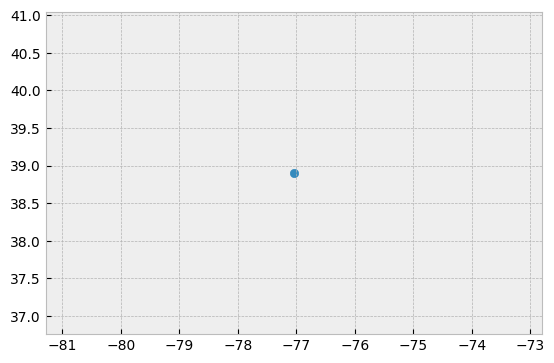

In [4]:
# Coordinates of the GW department of geography in Decimal Degrees
coordinate = [-77.04639494419096,  38.89934963421794]

# Create a Shapely point from a coordinate pair
point_coord = Point(coordinate)

# create a dataframe with needed attributes and required geometry column
df = {'GWU': ['Dept Geography'], 'geometry': [point_coord]}

# Convert shapely object to a geodataframe 
point = gpd.GeoDataFrame(df, geometry='geometry', crs ="EPSG:4326")

# Let's see what we have
point.plot()

<AxesSubplot: >

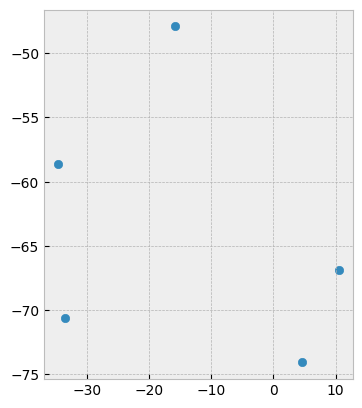

In [5]:
# list of attributes and coordinates
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'lat': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'lon': [-58.66, -47.91, -70.66, -74.08, -66.86]})

# Create a Shapely points from the coordinate-tuple list
ply_coord = [Point(x, y) for x, y in zip(df.lat, df.lon)]

# Convert shapely object to a geodataframe with a crs
poly = gpd.GeoDataFrame(df, geometry=ply_coord, crs ="EPSG:4326")

# Let's see what we have
poly.plot()

In [7]:
import pandas as pd
# create an outline of Washington DC and write to csv
path_to_csv = r'Data/points.csv'
points = {'Corner':['N','E','S','W'],
          'lon': [-77.0412826538086, -77.11681365966797, -77.01896667480469, -77.0412826538086], 
          'lat': [38.99570671505043, 38.936713143230044, 38.807610542357594, 38.99570671505043]}
points = pd.DataFrame.from_dict(points)
points.to_csv(path_to_csv)              

In [8]:
# read the point data in 
df = pd.read_csv(path_to_csv)

# Create a geodataframe from the data using and 'EPSG' code to assign WGS84 coordinate reference system
points= gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(x=df.lon, y=df.lat), crs = 'EPSG:4326')
points

,Unnamed: 0,Corner,lon,lat,geometry
0,0,N,-77.041283,38.995707,POINT (-77.04128 38.99571)
1,1,E,-77.116814,38.936713,POINT (-77.11681 38.93671)
2,2,S,-77.018967,38.807611,POINT (-77.01897 38.80761)
3,3,W,-77.041283,38.995707,POINT (-77.04128 38.99571)


In [9]:
from io import StringIO 
data = """
ID,X,Y,Speed
1,  -87.789,  41.976,  16
1,  -87.482,  41.677,  17
2,  -87.739,  41.876,  16
2,  -87.681,  41.798,  16
2,  -87.599,  41.708,  16
3,  -87.599,  41.908,  17
3,  -87.598,  41.708,  17
3,  -87.643,  41.675,  17
"""
# use StringIO to read in text chunk
df = pd.read_table(StringIO(data), sep=',')

<AxesSubplot: >

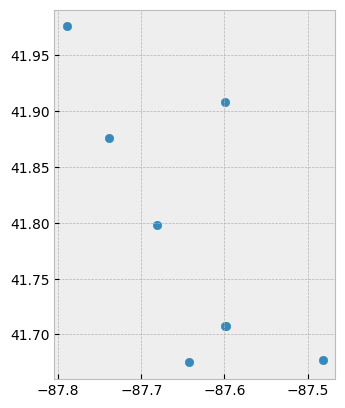

In [10]:
#zip the coordinates into a point object and convert to a GeoData Frame
points = [Point(xy) for xy in zip(df.X, df.Y)]
geo_df = gpd.GeoDataFrame(df, geometry=points, crs = 'EPSG:4326')
geo_df.plot()

<AxesSubplot: >

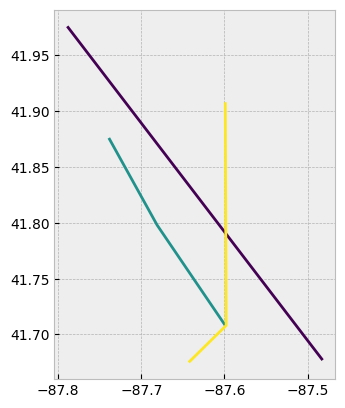

In [11]:
# treat each `ID` group of points as a line
lines = geo_df.groupby(['ID'])['geometry'].apply(lambda x:  LineString(x.tolist()))

# store as a GeodataFrame and add 'ID' as a column (currently stored as the 'index')
lines = gpd.GeoDataFrame(lines, geometry='geometry', crs="EPSG:4326") 
lines.reset_index(inplace=True)
lines.plot(column='ID')

<AxesSubplot: >

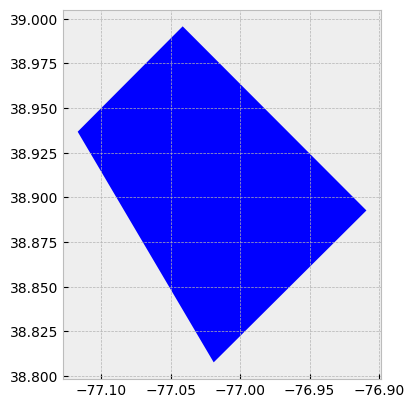

In [12]:
# list of coordindate pairs
coordinates = [[ -77.0412826538086, 38.99570671505043 ], [ -77.11681365966797, 38.936713143230044 ], [ -77.01896667480469, 38.807610542357594],
               [-76.90910339355469,  38.892636142310295]]           

# Create a Shapely polygon from the coordinate-tuple list
ply_coord = Polygon(coordinates)

# create a dictionary with needed attributes and required geometry column
df = {'Attribute': ['name1'], 'geometry': ply_coord}

# Convert shapely object to a geodataframe 
poly = gpd.GeoDataFrame(df, geometry='geometry', crs ="EPSG:4326")

# Let's see what we have
poly.plot()

In [13]:
# Determine the output path for the Shapefile
outfp = r"Data/gwu_geog.shp"

# Write the data into that Shapefile
poly.to_file(outfp)